In [ ]:
#%%

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#%%

df = pd.read_csv("datasets\csv\DlDataSinr.csv")
df

,Time,CellId,RNTI,BWPId,SINR(dB)
0,1.01314,2,10,0,26.17260
1,1.01321,2,9,0,25.03530
2,1.01329,2,8,0,33.15210
3,1.01336,2,7,0,21.16370
4,1.01343,2,6,0,11.30440
...,...,...,...,...,...
25416,5.99936,2,9,0,26.65420
25417,5.99950,2,8,0,15.86950
25418,5.99964,2,7,0,12.39780
25419,5.99979,2,6,0,6.62462


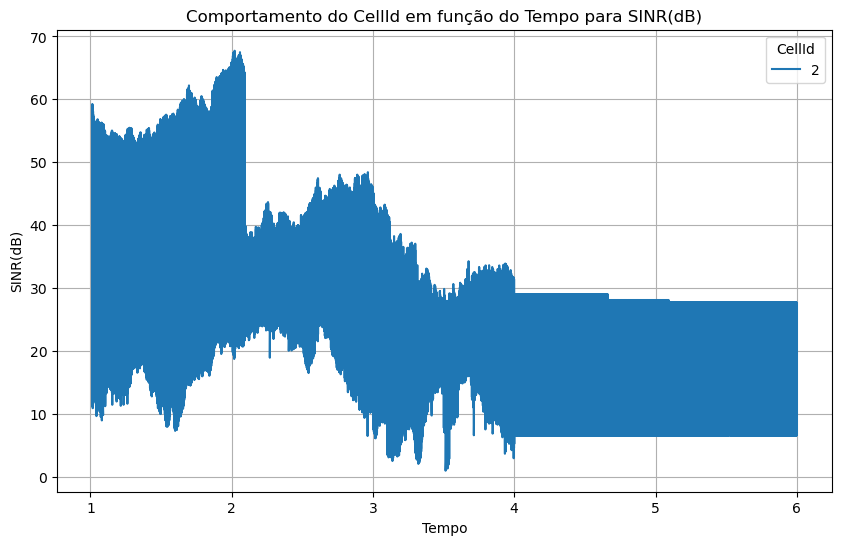

In [ ]:
#%%

# Agrupar os dados pelo CellId e calcular a média do SINR(dB) para cada tempo
df_grouped = df.groupby(['Time', 'CellId'])['SINR(dB)'].mean().unstack()

# Plotar o comportamento do CellId em função do tempo para a coluna SINR(dB)
df_grouped.plot(figsize=(10, 6))
plt.title('Comportamento do CellId em função do Tempo para SINR(dB)')
plt.xlabel('Tempo')
plt.ylabel('SINR(dB)')
plt.legend(title='CellId')
plt.grid(True)
plt.show()

In [ ]:
# %%

df_filtered = df[(df['Time'] >= 0.430) & (df['Time'] <= 0.435)]

df_filtered

,Time,CellId,RNTI,BWPId,SINR(dB)


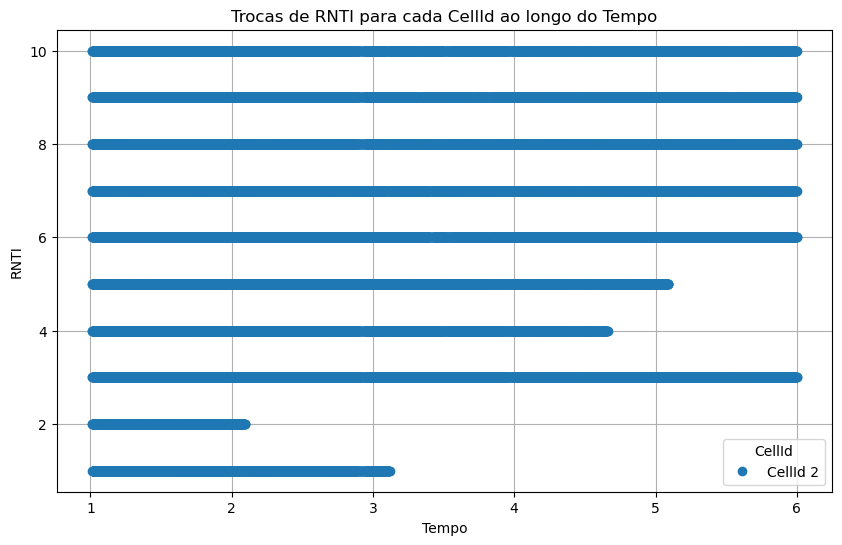

In [ ]:
# %%

# Identificar as trocas de RNTI para cada CellId
df_shifted = df[['Time', 'CellId', 'RNTI']].shift(1)
df_shifted.columns = ['Time_prev', 'CellId_prev', 'RNTI_prev']
df_combined = pd.concat([df, df_shifted], axis=1)

# Filtrar as linhas onde o RNTI mudou para um CellId específico
df_changes = df_combined[df_combined['RNTI'] != df_combined['RNTI_prev']]

# Plotar as trocas de RNTI para cada CellId
plt.figure(figsize=(10, 6))
for cell_id in df_changes['CellId'].unique():
    df_cell = df_changes[df_changes['CellId'] == cell_id]
    plt.plot(df_cell['Time'], df_cell['RNTI'], marker='o', linestyle='', label=f'CellId {cell_id}')

plt.title('Trocas de RNTI para cada CellId ao longo do Tempo')
plt.xlabel('Tempo')
plt.ylabel('RNTI')
plt.legend(title='CellId')
plt.grid(True)
plt.show()